In [1]:
!pip3 install nltk

In [2]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (1.0.2)


In [3]:
import pandas as pd
import numpy as np
import os
import sys

In [4]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [7]:
import re

In [8]:
import gensim
from gensim.utils import simple_preprocess

In [9]:
!pip install spacy

In [10]:
#!pip install wordcloud

In [11]:
from wordcloud import WordCloud

In [12]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist

In [13]:
valid = pd.read_csv('Valid.csv')
test = pd.read_csv("Test.csv")
train = pd.read_csv('Train.csv')

In [14]:
valid['text'] = valid['text'].apply(str).map(lambda x: re.sub('[,\.!?]', 
'', x))

In [15]:
valid['text'] = valid['text'].apply(str).map(lambda x: x.lower())

In [16]:
test['text'] = test['text'].apply(str).map(lambda x: re.sub('[,\.!?]', 
'', x))

In [17]:
test['text'] = test['text'].apply(str).map(lambda x: x.lower())

In [18]:
train['text'] = train['text'].apply(str).map(lambda x: re.sub('[,\.!?]', 
'', x))

In [19]:
train['text'] = train['text'].apply(str).map(lambda x: x.lower())

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [21]:
print(train['text'].apply(str).head())

0    i grew up (b 1965) watching and loving the thu...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object


In [39]:
train.head()

,text,label
0,i grew up (b 1965) watching and loving the thu...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [40]:
valid.head()

,text,label
0,it's been about 14 years since sharon stone aw...,0
1,someone needed to make a car payment this is t...,0
2,the guidelines state that a comment must conta...,0
3,this movie is a muddled mish-mash of clichés f...,0
4,before stan laurel became the smaller half of ...,0


In [41]:
test.head()

,text,label
0,i always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(dir-steve ...,0
2,this movie was so poorly written and directed ...,0
3,the most interesting thing about miryang (secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


# Tokenisation

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

In [23]:
train_df = train['text'].tolist()
#df_imdb =data['text'][0:500].tolist()

In [24]:
data_words =list(sent_to_words(train_df))

In [25]:
print('data_words[:1]', data_words[:1])

data_words[:1] [['grew', 'up', 'watching', 'and', 'loving', 'the', 'thunderbirds', 'all', 'my', 'mates', 'at', 'school', 'watched', 'we', 'played', 'thunderbirds', 'before', 'school', 'during', 'lunch', 'and', 'after', 'school', 'we', 'all', 'wanted', 'to', 'be', 'virgil', 'or', 'scott', 'no', 'one', 'wanted', 'to', 'be', 'alan', 'counting', 'down', 'from', 'became', 'an', 'art', 'form', 'took', 'my', 'children', 'to', 'see', 'the', 'movie', 'hoping', 'they', 'would', 'get', 'glimpse', 'of', 'what', 'loved', 'as', 'child', 'how', 'bitterly', 'disappointing', 'the', 'only', 'high', 'point', 'was', 'the', 'snappy', 'theme', 'tune', 'not', 'that', 'it', 'could', 'compare', 'with', 'the', 'original', 'score', 'of', 'the', 'thunderbirds', 'thankfully', 'early', 'saturday', 'mornings', 'one', 'television', 'channel', 'still', 'plays', 'reruns', 'of', 'the', 'series', 'gerry', 'anderson', 'and', 'his', 'wife', 'created', 'jonatha', 'frakes', 'should', 'hand', 'in', 'his', 'directors', 'chair'

In [26]:
train['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [27]:
#Splitting Dataset
train_x = train['text']
valid_x = valid['text']
test_x = test['text']
train_y = train['label']
valid_y = valid['label']
test_y = test['label']

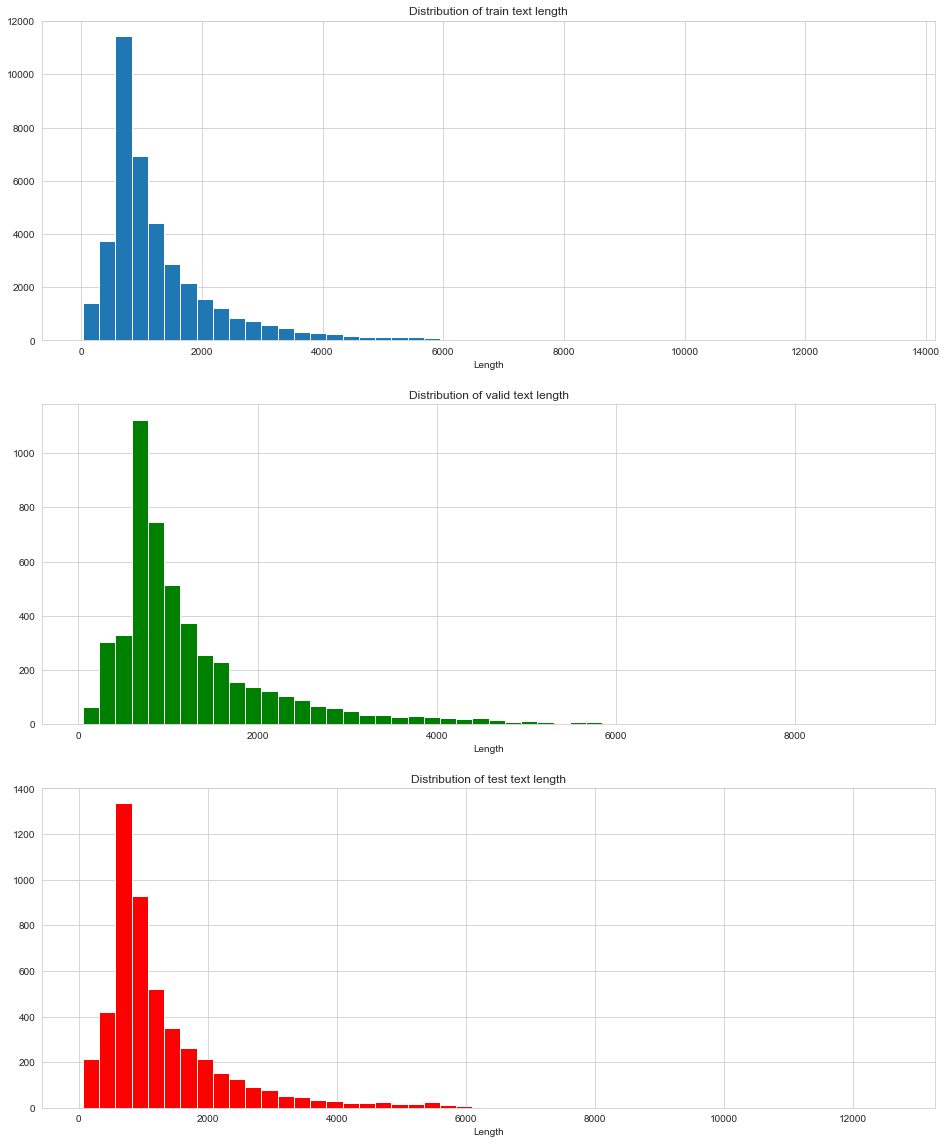

In [28]:
plt.figure(figsize=(16,20))

plt.subplot(3,1,1)
train_len = [len(l) for l in train_x]
plt.hist(train_len,bins=50)
plt.title('Distribution of train text length')
plt.xlabel('Length')

plt.subplot(3,1,2)
valid_len = [len(l) for l in valid_x]
plt.hist(valid_len,bins=50,color='green')
plt.title('Distribution of valid text length')
plt.xlabel('Length')

plt.subplot(3,1,3)
test_len = [len(l) for l in test_x]
plt.hist(test_len,bins=50,color='red')
plt.title('Distribution of test text length')
plt.xlabel('Length')

plt.show()

In [29]:
def getWordCloud(hashtags):
    
  # Read the whole text.
    text = ' '.join(hashtags)
  # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
  # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500) 
    plt.show()

## WORDCLOUD FOR POSITIVE

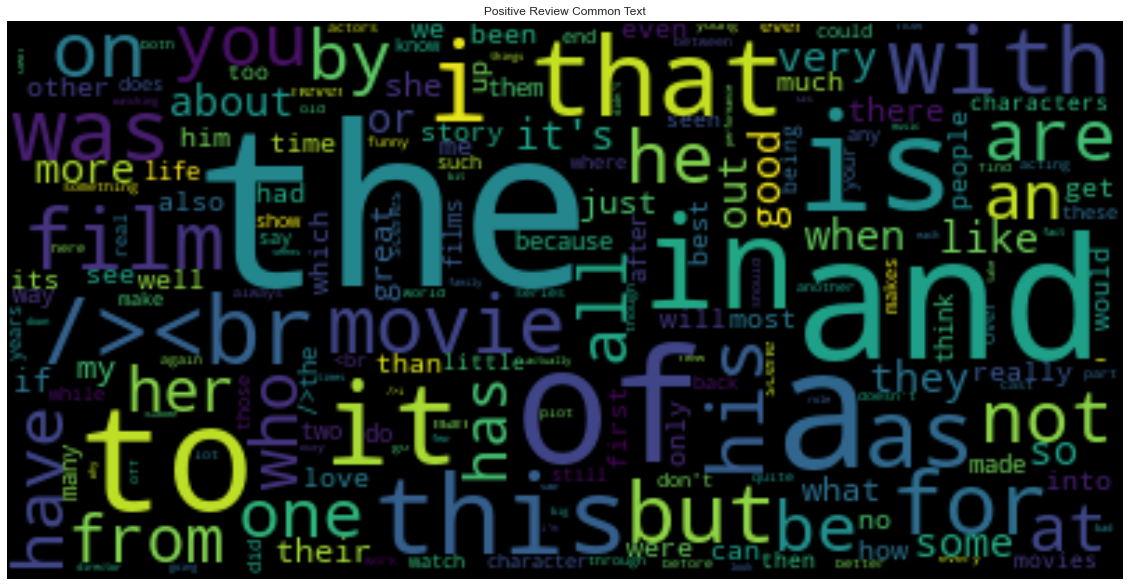

In [30]:
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(train[train['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

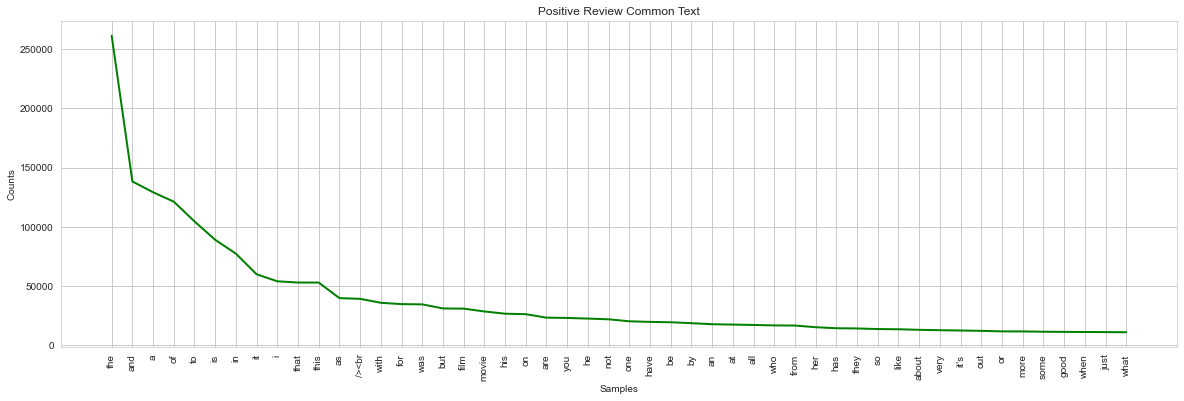

In [31]:
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text',color = "green")
plt.show()

## WORDCLOUD FOR NEGATIVE

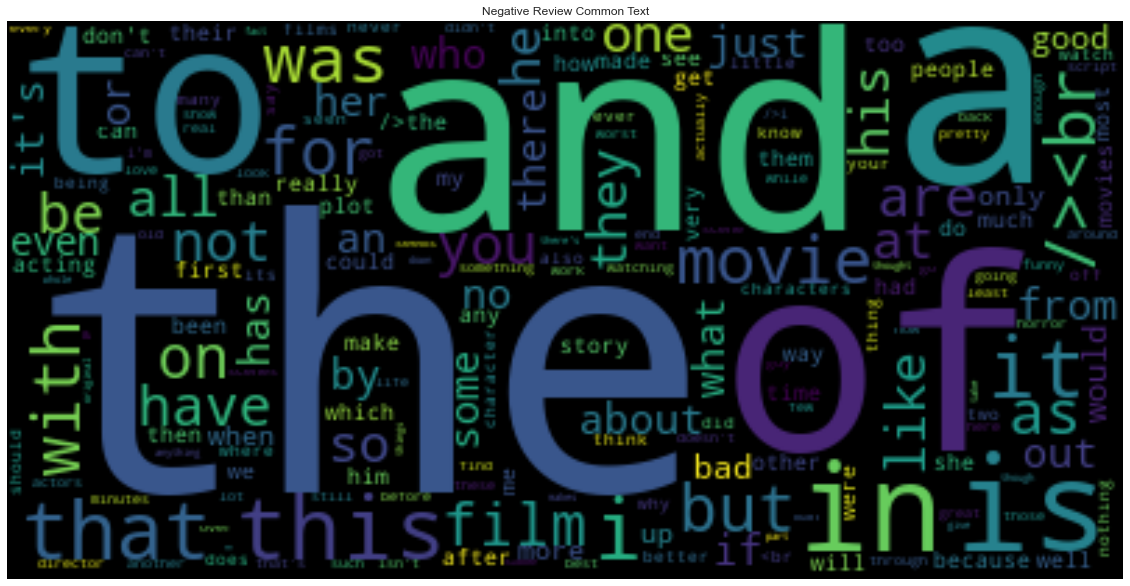

In [32]:
plt.figure(figsize=(20,20))
neg_freq = FreqDist(' '.join(train[train['label'] == 0].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=neg_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()

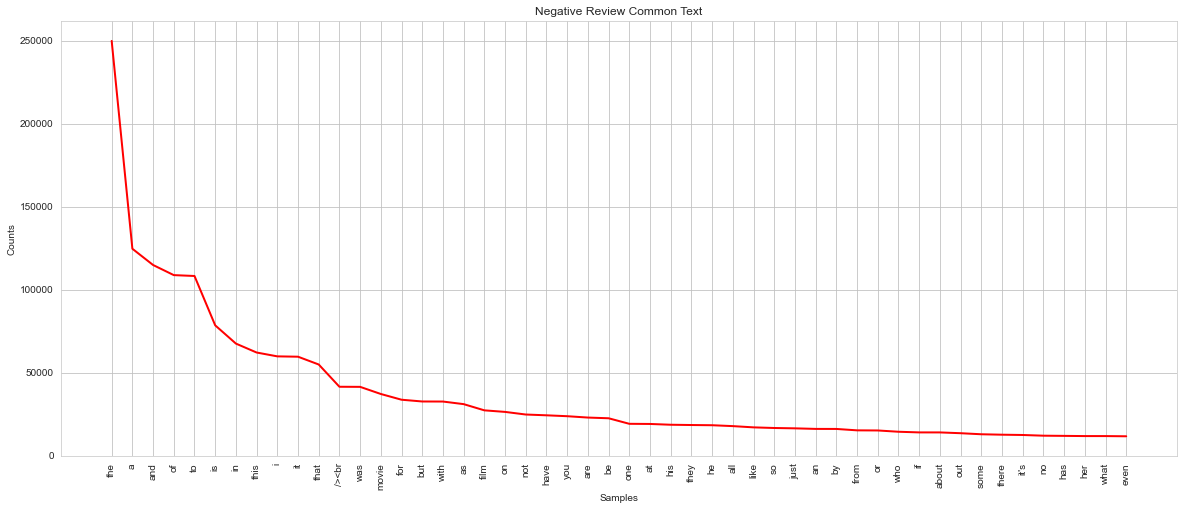

In [33]:
plt.figure(figsize=(20,8))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()

# Tokenisation

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Tokenize the sentences
tokenizer = Tokenizer()
#preparing vocabulary
tokenizer.fit_on_texts(train_x)
#converting text into integer sequences
train_x = tokenizer.texts_to_sequences(train_x)
valid_x = tokenizer.texts_to_sequences(valid_x)
test_x = tokenizer.texts_to_sequences(test_x)
#padding to prepare sequences of same length
train_x=pad_sequences(train_x,maxlen=120)
valid_x=pad_sequences(valid_x,maxlen=120)
test_x=pad_sequences(test_x,maxlen=120)

In [35]:
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)

128422


## DEFINING THE ARCHITECTURE

In [36]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
#embedding layer
model.add(Embedding(size_of_vocabulary,128,input_length=120))
#lstm layer
model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.2)))
#Global Maxpooling
model.add(GlobalMaxPooling1D())
#Dense Layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1,activation='sigmoid'))
#Add loss function, metrics, optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#Adding callbacks
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          16438016  
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [37]:
history = model.fit(train_x,train_y,batch_size=128,epochs=4,
                    validation_data=(valid_x,valid_y),verbose=1,callbacks=[es,mc])

Epoch 1/4
313/313 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.7791
Epoch 00001: val_accuracy improved from -inf to 0.86860, saving model to best_model.h5
313/313 [==============================] - 195s 603ms/step - loss: 0.4413 - accuracy: 0.7791 - val_loss: 0.3187 - val_accuracy: 0.8686
Epoch 2/4
313/313 [==============================] - ETA: 0s - loss: 0.1991 - accuracy: 0.9241
Epoch 00002: val_accuracy improved from 0.86860 to 0.86880, saving model to best_model.h5
313/313 [==============================] - 176s 563ms/step - loss: 0.1991 - accuracy: 0.9241 - val_loss: 0.3110 - val_accuracy: 0.8688
Epoch 3/4
313/313 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9681
Epoch 00003: val_accuracy did not improve from 0.86880
313/313 [==============================] - 187s 599ms/step - loss: 0.0951 - accuracy: 0.9681 - val_loss: 0.3777 - val_accuracy: 0.8630
Epoch 4/4
313/313 [==============================] - ETA: 0s - loss: 0.0468 - 

In [42]:
# from sklearn.model_selection import train_test_split 
# train_x,test_y,train_y,test_y=train_test_split(set.label,train_size=0.8)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(train_x,train_y)

RandomForestClassifier(n_estimators=50)

In [46]:
RandomForestClassifier(n_estimators=50)

RandomForestClassifier(n_estimators=50)

In [48]:
pre=rf.predict(test_x)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
predic=rf.predict(test_x)
print(accuracy_score(predic,test_y))

0.536
